In [26]:
from datetime import datetime, date
import csv
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [27]:
# Here is the array of the 100 meters in the town of Fort Lee.
NUMBER_OF_METERS = 100
meter_numbers = np.arange(NUMBER_OF_METERS)
meters_array = [None] * NUMBER_OF_METERS
batteries_day_count = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
batteries_zone_count = np.array([0, 0, 0, 0])
batteries_month_count = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
# Here are the variables needed to make the
# machine learning aspect work.
total_days = 0
total_num_of_meters_with_battery_changed = 0

In [29]:
# This code to import the meter information from the maintenance file.
with open('MeterInfo.csv', encoding="utf-8-sig") as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        battery_date_change = datetime(int(row[0]), int(row[1]), int(row[2]))
        meter_number = int(row[3])
        
        # This next if else statement is for the zone bar chart
        if 1 <= meter_number <=25:
            batteries_zone_count[0] += 1
        elif 26 <= meter_number <= 50:
            batteries_zone_count[1] += 1
        elif 51 <= meter_number <= 75:
            batteries_zone_count[2] += 1
        elif 76 <= meter_number <= 100:
            batteries_zone_count[3] += 1
                
        # This next if else statement is for the pie chart
        month = int(row[1]) - 1
        batteries_month_count[month] += 1

        if meters_array[meter_number] is None:
            meters_array[meter_number] = battery_date_change
        else:
            difference = battery_date_change - meters_array[meter_number]
            total_days = int(difference.days) + total_days
            total_num_of_meters_with_battery_changed += 1
            meters_array[meter_number] = battery_date_change
            
            # This next if else statement is to populate the scatter plot.
            if int(difference.days) <= 10:
                batteries_day_count[1] += 1
            elif 11 <= int(difference.days) <= 20:
                batteries_day_count[2] += 1
            elif 21 <= int(difference.days) <= 30:
                batteries_day_count[3] += 1
            elif 31 <= int(difference.days) <= 40:
                batteries_day_count[4] += 1
            elif 41 <= int(difference.days) <= 50:
                batteries_day_count[5] += 1
            elif 51 <= int(difference.days) <= 60:
                batteries_day_count[6] += 1
            elif 61 <= int(difference.days) <= 70:
                batteries_day_count[7] += 1
            elif 71 <= int(difference.days) <= 80:
                batteries_day_count[8] += 1
            elif 81 <= int(difference.days) <= 90:
                batteries_day_count[9] += 1
            elif 91 <= int(difference.days) <= 100:
                batteries_day_count[10] += 1

In [30]:
linreg = LinearRegression()

In [31]:
days = np.array([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [32]:
days = days.reshape(-1, 1)

In [33]:
linreg.fit(days, batteries_day_count)

LinearRegression()

In [34]:
y_pred = linreg.predict(days)

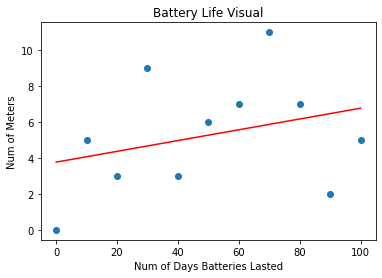

In [35]:
plt.scatter(days, batteries_day_count)
plt.ylabel("Num of Meters")
plt.xlabel("Num of Days Batteries Lasted")
plt.title("Battery Life Visual")
plt.plot(days, y_pred, color='red')
plt.show()

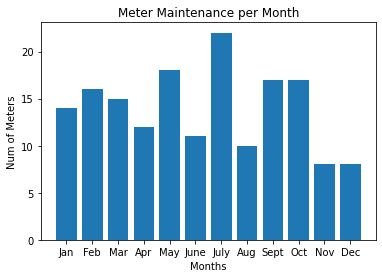

In [41]:
# This next code is for the bar chart
months = ["Jan", "Feb", "Mar", "Apr", "May", "June", "July", "Aug", "Sept", "Oct", "Nov", "Dec"]
xpos = np.arange(len(months))
plt.xticks(xpos, months)
plt.ylabel("Num of Meters")
plt.xlabel("Months")
plt.title("Meter Maintenance per Month")
plt.bar(xpos, batteries_month_count)
plt.show()

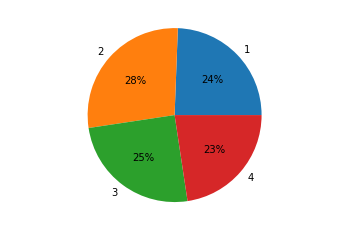

In [43]:
# This code is for the pie chart
zone_labels = [1, 2, 3, 4]
plt.axis("equal")
plt.pie(batteries_zone_count, labels=zone_labels, autopct='%0.0f%%')
plt.show()

In [38]:
# Now print out the meters that need to be changed soon
average_fail_time = total_days / total_num_of_meters_with_battery_changed
count = 0
print("Based on the previous maintenance meter information,")
print("the average life span of the batteries is " + str(average_fail_time) + " days.")
print()
print("Here are the meters that will fail soon due to bad batteries:")
while count < NUMBER_OF_METERS - 1:
    if meters_array[count] is not None:
        num_of_days_since_changed = datetime.today() - meters_array[count]
        if int(num_of_days_since_changed.days) > average_fail_time:
            if 0 <= count <= 25:
                print("Meter Number " + str((count + 1)) + " Zone: 1")
            if 26 <= count <= 50:
                print("Meter Number " + str((count + 1)) + " Zone: 2")
            if 51 <= count <= 75:
                print("Meter Number " + str((count + 1)) + " Zone: 3")
            if 76 <= count <= 100:
                print("Meter Number " + str((count + 1)) + " Zone: 4")
            
    count += 1

Based on the previous maintenance meter information,
the average life span of the batteries is 90.33333333333333 days.

Here are the meters that will fail soon due to bad batteries:
Meter Number 2 Zone: 1
Meter Number 3 Zone: 1
Meter Number 4 Zone: 1
Meter Number 6 Zone: 1
Meter Number 7 Zone: 1
Meter Number 8 Zone: 1
Meter Number 9 Zone: 1
Meter Number 10 Zone: 1
Meter Number 11 Zone: 1
Meter Number 14 Zone: 1
Meter Number 15 Zone: 1
Meter Number 16 Zone: 1
Meter Number 17 Zone: 1
Meter Number 18 Zone: 1
Meter Number 21 Zone: 1
Meter Number 24 Zone: 1
Meter Number 25 Zone: 1
Meter Number 26 Zone: 1
Meter Number 27 Zone: 2
Meter Number 28 Zone: 2
Meter Number 29 Zone: 2
Meter Number 31 Zone: 2
Meter Number 32 Zone: 2
Meter Number 33 Zone: 2
Meter Number 35 Zone: 2
Meter Number 36 Zone: 2
Meter Number 37 Zone: 2
Meter Number 38 Zone: 2
Meter Number 40 Zone: 2
Meter Number 41 Zone: 2
Meter Number 43 Zone: 2
Meter Number 45 Zone: 2
Meter Number 46 Zone: 2
Meter Number 47 Zone: 2
Meter Num